In [99]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# ****Homework 1****

In [100]:
import pandas as pd

data2 = {
    'Date': pd.date_range(start='2023-01-01', periods=10),
    'Product_A': [120, 150, 130, 110, 140, 160, 135, 125, 145, 155],
    'Product_B': [90, 110, 100, 80, 95, 105, 98, 88, 102, 112],
    'Product_C': [75, 80, 85, 70, 88, 92, 78, 82, 87, 90]
}

df2 = pd.DataFrame(data2)


## **Exercise 1**

In [101]:
total_sales = df2[['Product_A', 'Product_B', 'Product_C']].apply(sum)
print(total_sales)

Product_A    1370
Product_B     980
Product_C     827
dtype: int64


## **Exercise 2**

In [102]:
df2['total_sales'] = df2[['Product_A', 'Product_B', 'Product_C']].sum(axis=1)
highest_id = df2['total_sales'].idxmax()
print(df2.loc[highest_id, 'Date'])

2023-01-06 00:00:00


## **Exercise 3**

In [103]:
df2['Product_A_pct_change'] = df2['Product_A'].pct_change() * 100
df2['Product_B_pct_change'] = df2['Product_B'].pct_change() * 100
df2['Product_C_pct_change'] = df2['Product_C'].pct_change() * 100
print(df2[['Date', 'Product_A_pct_change', 'Product_B_pct_change', 'Product_C_pct_change']].round(3).fillna(0))


        Date  Product_A_pct_change  Product_B_pct_change  Product_C_pct_change
0 2023-01-01                 0.000                 0.000                 0.000
1 2023-01-02                25.000                22.222                 6.667
2 2023-01-03               -13.333                -9.091                 6.250
3 2023-01-04               -15.385               -20.000               -17.647
4 2023-01-05                27.273                18.750                25.714
5 2023-01-06                14.286                10.526                 4.545
6 2023-01-07               -15.625                -6.667               -15.217
7 2023-01-08                -7.407               -10.204                 5.128
8 2023-01-09                16.000                15.909                 6.098
9 2023-01-10                 6.897                 9.804                 3.448


## **Exercise 4**

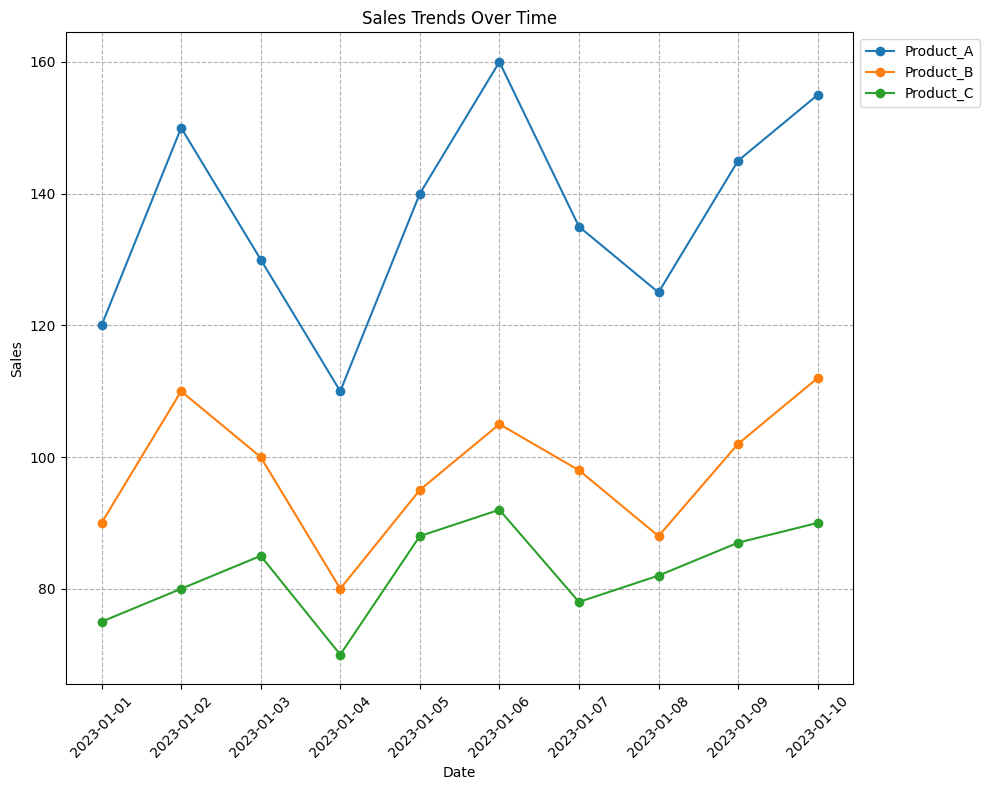

In [104]:
plt.figure(figsize=(df2.shape[0], df2.shape[1]))

for product in list(df2.columns[1:4]):
    plt.plot(df2['Date'], df2[product], label=product, marker = 'o')

plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc = 'upper left',bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

# **Homework 2**

In [105]:
data3 = {
    'Employee_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Department': ['HR', 'IT', 'Marketing', 'IT', 'Finance', 'HR', 'Marketing', 'IT', 'Finance', 'Marketing'],
    'Salary': [60000, 75000, 65000, 80000, 70000, 72000, 68000, 78000, 69000, 76000],
    'Experience (Years)': [3, 5, 2, 8, 4, 6, 3, 7, 2, 5]
}

df3 = pd.DataFrame(data3)
df3


,Employee_ID,Name,Department,Salary,Experience (Years)
0,101,Alice,HR,60000,3
1,102,Bob,IT,75000,5
2,103,Charlie,Marketing,65000,2
3,104,David,IT,80000,8
4,105,Emma,Finance,70000,4
5,106,Frank,HR,72000,6
6,107,Grace,Marketing,68000,3
7,108,Hank,IT,78000,7
8,109,Ivy,Finance,69000,2
9,110,Jack,Marketing,76000,5


### **Exercise 1**

In [106]:
ex1 = df3.groupby('Department')['Salary'].mean().reset_index()
ex1[['Department','Salary']]

,Department,Salary
0,Finance,69500.000000
1,HR,66000.000000
2,IT,77666.666667
3,Marketing,69666.666667


### **Exercise 2**

In [107]:
df3[df3['Experience (Years)'] == df3['Experience (Years)'].max()]

,Employee_ID,Name,Department,Salary,Experience (Years)
3,104,David,IT,80000,8


### **Exercise 3**


In [108]:
min_salary = df3['Salary'].min()
df3['Salary Increase'] = df3['Salary'].apply(lambda x: (((x - min_salary) / min_salary) * 100).round(3))
df3


,Employee_ID,Name,Department,Salary,Experience (Years),Salary Increase
0,101,Alice,HR,60000,3,0.000
1,102,Bob,IT,75000,5,25.000
2,103,Charlie,Marketing,65000,2,8.333
3,104,David,IT,80000,8,33.333
4,105,Emma,Finance,70000,4,16.667
5,106,Frank,HR,72000,6,20.000
6,107,Grace,Marketing,68000,3,13.333
7,108,Hank,IT,78000,7,30.000
8,109,Ivy,Finance,69000,2,15.000
9,110,Jack,Marketing,76000,5,26.667


### **Exercise 4**

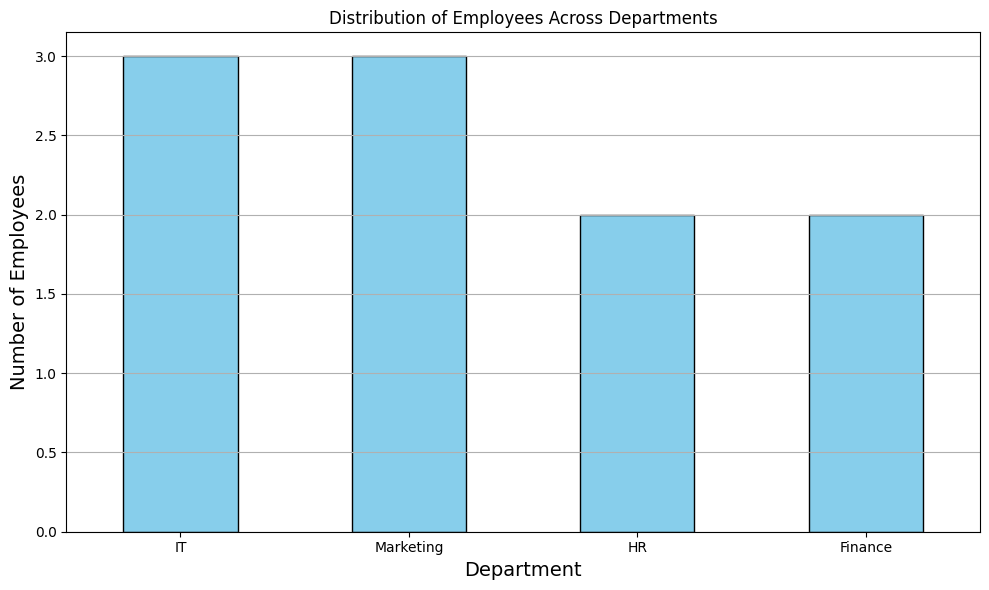

In [109]:
EmpPerDep = df3['Department'].value_counts()

plt.figure(figsize=(df3.shape[0], EmpPerDep.max()*2))

EmpPerDep.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Employees Across Departments')
plt.xlabel('Department', fontsize = 14)
plt.ylabel('Number of Employees', fontsize = 14)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-')
plt.tight_layout()
plt.show()

# **Homework 3** 

In [110]:
data4 = {
    'Order_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Customer_ID': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    'Product': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'B', 'A'],
    'Quantity': [2, 3, 1, 4, 2, 3, 2, 5, 1, 3],
    'Total_Price': [120, 180, 60, 240, 160, 270, 140, 300, 90, 180]
}

df4 = pd.DataFrame(data4)
df4


,Order_ID,Customer_ID,Product,Quantity,Total_Price
0,101,201,A,2,120
1,102,202,B,3,180
2,103,203,A,1,60
3,104,204,C,4,240
4,105,205,B,2,160
5,106,206,C,3,270
6,107,207,A,2,140
7,108,208,C,5,300
8,109,209,B,1,90
9,110,210,A,3,180


### **Exercise 1**

In [111]:
print("Total Revenue:", df4['Total_Price'].sum())


Total Revenue: 1740


### **Exercise 2**

In [112]:
ex2 = df4.groupby('Product')['Quantity'].sum().reset_index()
ex2[ex2['Quantity'] == ex2['Quantity'].max()]

,Product,Quantity
2,C,12


### **Exercise 3**

In [113]:
avg = df4['Quantity'].agg('mean')
print(avg)

2.6


### **Exercise 4**

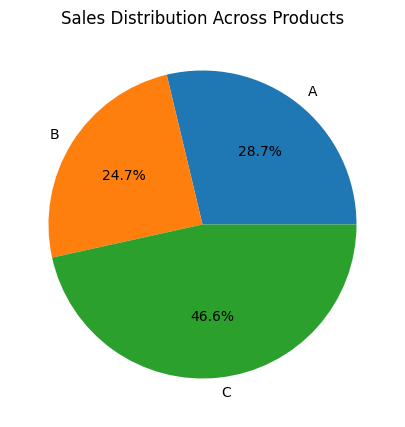

In [114]:
product_sales = df4.groupby('Product')['Total_Price'].sum()

product_sales.plot(kind = 'pie',
                   autopct = '%1.1f%%',
                   figsize = (df4.shape[0], df4.shape[1]),
                   legend = False
                   )
plt.title('Sales Distribution Across Products')
plt.ylabel('')
plt.show()